In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import  DataFrame as df
%matplotlib inline
import seaborn as sns


In [14]:
import numpy as np

In [2]:
df1=pd.read_excel('cancer_data6_1.xlsx',sheet_name="DEMOGRAPHICS")
df2=pd.read_excel('cancer_data6_1.xlsx',sheet_name='REFERRAL')
df3=pd.read_excel('cancer_data6_1.xlsx',sheet_name='IMAGING')
df4=pd.read_excel('cancer_data6_1.xlsx',sheet_name='DIAGNOSIS')
df5=pd.read_excel('cancer_data6_1.xlsx',sheet_name='CANCER CARE PLAN')
df6=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Staging')
df7=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Surgery&other procedures')
df8=pd.read_excel('cancer_data6_1.xlsx',sheet_name='Pathology Details')
df9=pd.read_excel("cancer_data6_1.xlsx",sheet_name="chemotheropy & other drugs")
df10=pd.read_excel("cancer_data6_1.xlsx",sheet_name="Radiotherapy(Teletherapy)")
df11=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Radiotherapy(Brachytherapy)')
df12=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Palliative Care')
df13=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Trials')
df14=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Clinical Status Assesment')
df15=pd.read_excel("cancer_data6_1.xlsx",sheet_name='Death Details')

In [8]:
def fun7(x):
    if str(x["PERSON DEATH DATE1"])=="-":
        return "-"
    else:
        return x['PERSON DEATH DATE1']-x['INVESTIGATION RESULT DATE']

In [5]:
temp=pd.concat([df15['PERSON DEATH DATE1'],df8['INVESTIGATION RESULT DATE']],axis=1)

In [6]:
final_level_delay=pd.DataFrame()

In [9]:
final_level_delay['delay_investigation&personDeathDate']=temp.apply(fun7,axis=1)

In [10]:
final_level_delay.head()

,delay_investigation&personDeathDate
0,245 days 06:22:51
1,0 days 00:00:00
2,0 days 00:00:00
3,0 days 00:00:00
4,0 days 00:00:00


In [12]:
final_level_delay['delay2_investigation&ClinicalStatusAssesment']=df14['CLINICAL STATUS ASSESSMENT DATE (CANCER)']-df8['INVESTIGATION RESULT DATE']

In [16]:
final_level_delay.to_excel("finalLevelDelay.xlsx",index=None)

In [43]:
final_level_delay=pd.read_excel("finalLevelDelay.xlsx")

In [31]:
l1=df(final_level_delay.iloc[0,0:]).values
l1=np.insert(l1,0,0)
days = l1[0:2]

In [32]:
days

array([   0.        ,  246.26586806])

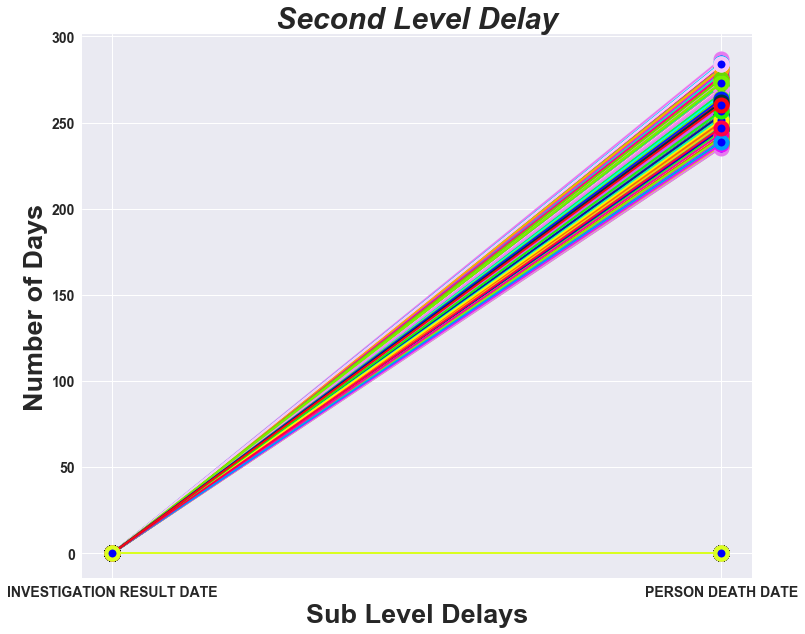

In [46]:
import pylab
def custom_color():
    """To generate unique colors"""
    return plt.cm.gist_ncar(np.random.random())
lst=['INVESTIGATION RESULT DATE','PERSON DEATH DATE']
names = lst
fig,ax=plt.subplots(figsize=(12,10))
for i in range(0,623):
    l1=df(final_level_delay.iloc[i,0:]).values
    l1=np.insert(l1,0,0)
    days = l1[0:2]
    x = range(len(lst))
    plt.xticks(x, names)
    plt.plot(x,days,color=custom_color(),marker='o',markerfacecolor="b",markeredgewidth=4,lw=1.9,markersize=12,label="patient-"+str(i))
plt.title("Second Level Delay",fontsize=30,style='oblique',weight='heavy')
plt.xlabel("Sub Level Delays",fontsize=27,weight='bold')
plt.ylabel('Number of Days',fontsize=27,weight='bold')
xlabels = ax.get_xticklabels()
plt.setp(xlabels, fontsize=14,weight='semibold')
ylabels = ax.get_yticklabels()
plt.setp(ylabels, fontsize=14,weight='semibold')
#plt.legend(fontsize=15)
plt.savefig("final_level_Delay01forallpatients.png")
plt.show()


In [36]:
final_level_delay=final_level_delay.iloc[:,1:]